In [42]:
import json 
import requests 
import datetime
import time 
import sqlalchemy
import pandas as pd 
import sqlite3
from sqlalchemy import insert
from sqlalchemy import table,column
import pandas as pd

### STEP 1
<!--  -->

In [43]:
sqlite_file ='C:/Users/91755/Desktop/Fall 2021/Data Engineering/CurrencyRates.db'
conn = sqlite3.connect(sqlite_file)
cur = conn.cursor()

In [44]:
cur.execute("select * from AUD limit 100;")
data = cur.fetchall()
print(data)

[(1636745511.876189, 73.33, 1636745511000), (1636745511.876189, 73.33, 1636745511000), (1636745511.876189, 73.33, 1636745511000), (1636745511.876189, 73.33, 1636745511000), (1636745572.294581, 73.32, 1636745572000), (1636745632.829993, 73.32, 1636745631000), (1636745693.226324, 73.32, 1636745692000), (1636745753.697264, 73.31, 1636745753000), (1636745814.104345, 73.33, 1636745813000), (1636745874.615749, 73.33, 1636745873000), (1636745935.113152, 73.31, 1636745933000), (1636745995.544435, 73.32, 1636745994000), (1636746055.842814, 73.33, 1636746054000), (1636746116.32732, 73.33, 1636746114000), (1636746176.752054, 73.32, 1636746176000), (1636746237.18576, 73.3, 1636746237000), (1636746297.622043, 73.33, 1636746295000), (1636746357.900463, 73.36, 1636746356000), (1636746418.317841, 73.34, 1636746418000), (1636746478.779647, 73.35, 1636746477000), (1636746539.572834, 73.33, 1636746539000), (1636746599.993313, 73.33, 1636746599000), (1636746660.805236, 73.34, 1636746660000), (1636746721.3

### STEP2: 
<!-- SQL -->



In [47]:
cur.execute("select FxRate from EUR where FxRate > 114.45;")
data = cur.fetchall()
print(data)

[(114.46,), (114.46,), (114.47,), (114.46,), (114.46,), (114.46,), (114.46,), (114.46,), (114.47,), (114.47,), (114.47,), (114.46,), (114.46,), (114.48,), (114.48,), (114.48,), (114.48,), (114.48,), (114.46,), (114.46,), (114.47,), (114.48,), (114.46,), (114.46,), (114.48,), (114.46,), (114.47,), (114.46,), (114.46,), (114.47,), (114.46,), (114.47,), (114.46,), (114.46,), (114.5,), (114.46,)]


In [48]:
df = pd.read_sql_query("select FxRate from EUR where FxRate > 114.45;", conn)
print("df.shape = " + str(df.shape))

df.shape = (36, 1)


In [49]:
df = pd.read_sql_query("select * from USD2CAD;", conn)
print("df.shape = " + str(df.shape))
print("Sanity check with Pandas head():")
print(df.head())
print("Summarize with Pandas describe():")
print(df.describe().transpose())

df.shape = (76, 3)
Sanity check with Pandas head():
      Timestamp  FxRate  TimestampEntry
0  1.636746e+09  125.56   1636745511000
1  1.636746e+09  125.54   1636745572000
2  1.636746e+09  125.54   1636745632000
3  1.636746e+09  125.56   1636745693000
4  1.636746e+09  125.56   1636745751000
Summarize with Pandas describe():
                count          mean           std           min           25%  \
Timestamp        76.0  1.636748e+09  1.605298e+03  1.636746e+09  1.636747e+09   
FxRate           76.0  1.254720e+02  3.588945e-02  1.254100e+02  1.254475e+02   
TimestampEntry   76.0  1.636748e+12  1.605277e+06  1.636746e+12  1.636747e+12   

                         50%           75%           max  
Timestamp       1.636748e+09  1.636749e+09  1.636751e+09  
FxRate          1.254700e+02  1.254900e+02  1.255600e+02  
TimestampEntry  1.636748e+12  1.636749e+12  1.636751e+12  


In [50]:
df = pd.read_sql_query("select * from USD2CAD where FxRate>125.54;", conn)
print("df.shape = " + str(df.shape))

df = pd.read_sql_query("""
                       select FxRate,TimestampEntry from USD2CAD 
                       where FxRate > 124;
                       """,
                       conn)
df.to_sql("C:/Users/91755/Desktop/Fall 2021/Data Engineering/Currencyupdated.db", conn, if_exists="replace")
# close connection
conn.close()


df.shape = (3, 3)


#### STEP 3
<!--  -->



In [51]:
df.index.name = "Records"

print(df.head())

df.to_csv("C:/Users/91755/Desktop/Fall 2021/Data Engineering/Currencyupdated.csv", index=True)


         FxRate  TimestampEntry
Records                        
0        125.56   1636745511000
1        125.54   1636745572000
2        125.54   1636745632000
3        125.56   1636745693000
4        125.56   1636745751000


### STEP 4
<!--  -->


In [52]:
sqlite_file ='C:/Users/91755/Desktop/Fall 2021/Data Engineering/CurrencyRates.db'
conn = sqlite3.connect(sqlite_file)
df = pd.read_sql_query("select * from AUD;", conn)
print("df.shape = " + str(df.shape))
df.set_index("Timestamp", inplace=True)
conn.close()




df.shape = (79, 3)


In [53]:
print(df.head())


              FxRate  TimestampEntry
Timestamp                           
1.636746e+09   73.33   1636745511000
1.636746e+09   73.33   1636745511000
1.636746e+09   73.33   1636745511000
1.636746e+09   73.33   1636745511000
1.636746e+09   73.32   1636745572000


In [54]:
print(df.shape)
# get columns in the dataframe
print(df.columns)

# Now, use the .describe() method to easily get some summary statistics:
# get statistical summary
df.describe()
# view in transposed form
print(df.describe().transpose())

# Let's use .min(), .max(), .mean(), and .median() methods as well:
# get max and min values
df.max()
df.min()
df.mean()
print(df.median())

# Now, let's get the index of the maximum and minimum values using the .idmax() and .idmin():
# get index of max and min values
df.idxmax()
print(df.idxmin())

# Additionally, we can get specific rows with ease:
# get second row till end of data (index=1)
df.iloc[1]
# get fourth row till end of data (index=3)
df.iloc[3]
# print(df.loc[2])
# get first row of Fxrae column
print(df.iloc[0]['FxRate'])

# We can also isolate single columns, as follows:
# isolate single columns
df['TimestampEntry'].mean()
df['FxRate'].idxmax()
print(df['FxRate'].idxmin())

# We can even sort according to specific columns with the byarg.
# sort (ascending by default)
df.sort_values(by = 'FxRate')
# sort descending
df.sort_values(by = 'FxRate', ascending = False)
print(df.sort_values(by = 'FxRate', ascending = False).head())

# Now, let's do a permanent sort on the table with the inplace arg, 
# permanently changing how it's stored in memory:
# permanently sort the table
df.sort_values(by = 'FxRate', inplace=True)
# now call df.head() on permanently sorted table
print(df.head())

# In case we change our minds and want to undo the permanent sort, 
# we can sort according to the original index column and get our original data back:
# sort back on index
df.sort_values(by = 'Timestamp', inplace=True)
print(df.head())



df[df['FxRate'] > 114.43]
# get statistical summary of the filtered table
df[df['FxRate'] > 114.43].describe().transpose()



(79, 2)
Index(['FxRate', 'TimestampEntry'], dtype='object')
                count          mean           std           min           25%  \
FxRate           79.0  7.332759e+01  1.478176e-02  7.330000e+01  7.332000e+01   
TimestampEntry   79.0  1.636748e+12  1.645182e+06  1.636746e+12  1.636747e+12   

                         50%           75%           max  
FxRate          7.333000e+01  7.333000e+01  7.338000e+01  
TimestampEntry  1.636748e+12  1.636749e+12  1.636751e+12  
FxRate            7.333000e+01
TimestampEntry    1.636748e+12
dtype: float64
FxRate            1.636746e+09
TimestampEntry    1.636746e+09
dtype: float64
73.33
1636746237.18576
              FxRate  TimestampEntry
Timestamp                           
1.636751e+09   73.38   1636750928000
1.636746e+09   73.36   1636746356000
1.636751e+09   73.36   1636750988000
1.636750e+09   73.36   1636749904000
1.636750e+09   73.36   1636749844000
              FxRate  TimestampEntry
Timestamp                           
1.636746e

,count,mean,std,min,25%,50%,75%,max
FxRate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TimestampEntry,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### STEP5
<!--  -->



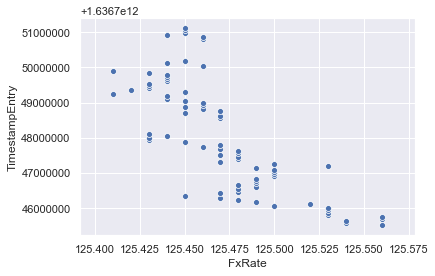

In [55]:
# Scatter plot:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv("C:/Users/91755/Desktop/Fall 2021/Data Engineering/Currencyupdated.csv")
# scatter plot
sns.scatterplot(x='FxRate', y='TimestampEntry', data=df)


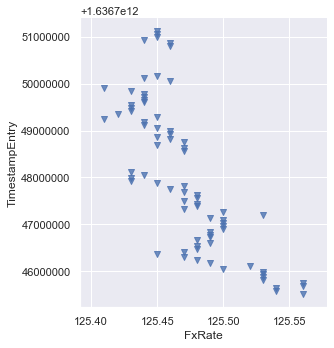

In [56]:
sns.lmplot(x='FxRate', y='TimestampEntry', 
            data=df, fit_reg=False,
           palette='bright',markers=['v'])

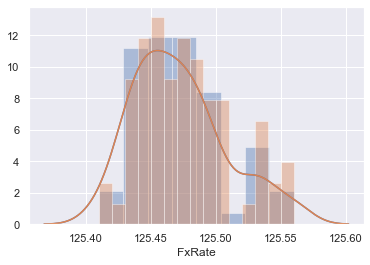

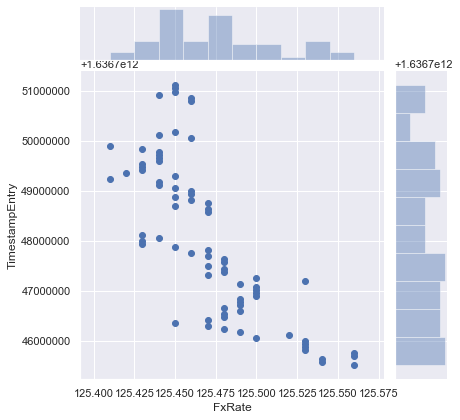

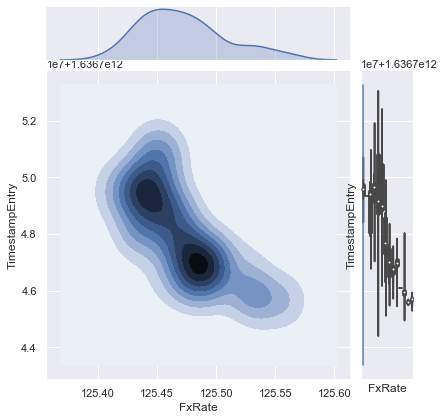

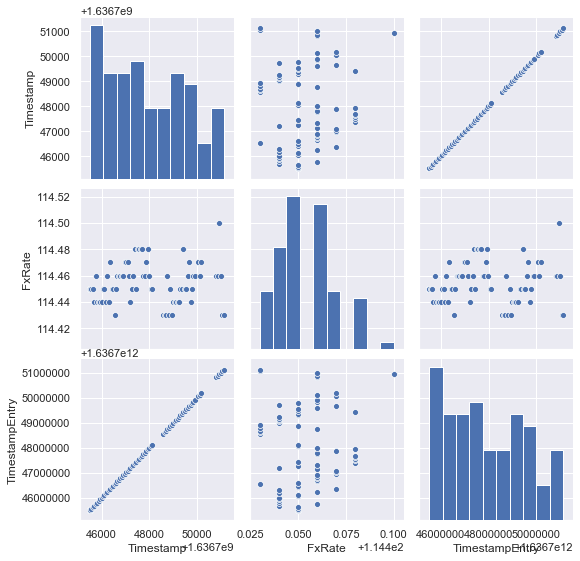

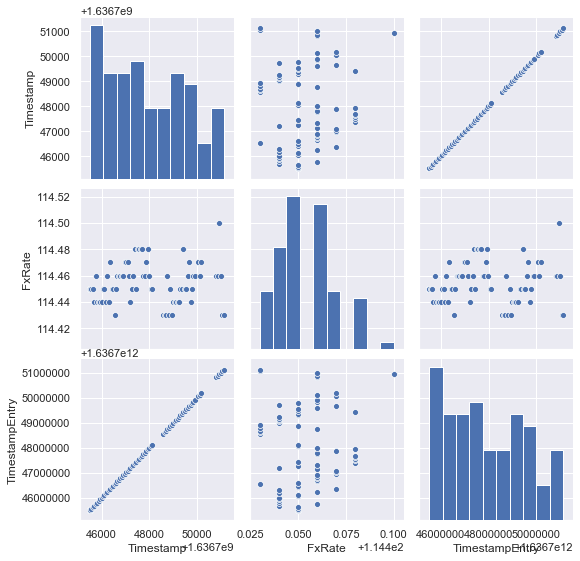

In [58]:
sns.distplot(df['FxRate'])
# histogram with 15 bins
sns.distplot(df['FxRate'], bins=15)

# Jointplots
sns.jointplot(x='FxRate', y='TimestampEntry', 
              data=df, kind='scatter', marginal_kws=dict(bins=10))
# jointplot with kde
sns.jointplot(x='FxRate', y='TimestampEntry', 
              data=df, kind='kde')

# Violin plots
# y='sepal width in cm'
sns.violinplot(x='FxRate', y='TimestampEntry', data=df)
# y='petal width in cm'
sns.violinplot(x='FxRate', y='TimestampEntry', data=df)

# Pairplots
# Let's load up the boston dataset and build a pairplot with five selected variables:
import pandas as pd
import sqlite3
sqlite_file = 'C:/Users/91755/Desktop/Fall 2021/Data Engineering/CurrencyRates.db' 
# Connecting to the database file
conn = sqlite3.connect(sqlite_file)
df = pd.read_sql_query("select * from EUR;", conn)
conn.close()
sns.pairplot(data=df)
# pairplot with selected features
vars_to_plot = ['Timestamp','FxRate','TimestampEntry']
sns.pairplot(data=df, vars=vars_to_plot)

### STEP7
<!--  -->

In [59]:
# 7. 7th step: missing values
# load iris dataset with missing values with .isnull()
import pandas as pd
df = pd.read_csv("C:/Users/91755/Desktop/Fall 2021/Data Engineering/Currencyupdated1.csv")
df.index.name = "Records"
print(df.head())

# get boolean (True/False) response for each datapoint for NaNs 
df['FxRate'].isnull()

# check if any missing values in column
print(df['FxRate'].isnull().values.any())

# get number of many missing values in column
print(df['FxRate'].isnull().values.sum())

# fill missing values with new values (--> "example"), store in new "df_example" dataframe 
df_example = df['FxRate'].fillna('N/a')
print(df_example.head())

# drop rows with missing data
df_dropped = df.dropna(axis=0)
print(df_dropped.head())
# we can also drop columns in a similar fashion:
# df_dropped = df.dropna(axis=1)
# Imputing to replace the missing values
# In the case of intermittent missing values, 
# we can predict the replacement values for the empty cells. 
# The mathematical apparatus for predicting these values is called an imputor.
# import imputer module from Scikit-learn and instantiate imputer object
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#define columns to impute on
cols = ['FxRate',
         'TimestampEntry',
         ]

# fit imputer and transform dataset, store in df_new
out_imp = imputer.fit_transform(df[cols])
df_new = pd.DataFrame(data = out_imp, columns = cols)
df_new = pd.concat([df_new, df[['NewColumn']]], axis = 1)
print(df_new.head())





         Records  FxRate  TimestampEntry  Unnamed: 3  NewColumn
Records                                                        
0              0  125.56    1.636750e+12         NaN        NaN
1              1  125.54    1.636750e+12         NaN        NaN
2              2  125.54    1.636750e+12         NaN        NaN
3              3  125.56    1.636750e+12         NaN        NaN
4              4  125.56    1.636750e+12         NaN        NaN
True
6
Records
0    125.56
1    125.54
2    125.54
3    125.56
4    125.56
Name: FxRate, dtype: object
Empty DataFrame
Columns: [Records, FxRate, TimestampEntry, Unnamed: 3, NewColumn]
Index: []
   FxRate  TimestampEntry  NewColumn
0  125.56    1.636750e+12        NaN
1  125.54    1.636750e+12        NaN
2  125.54    1.636750e+12        NaN
3  125.56    1.636750e+12        NaN
4  125.56    1.636750e+12        NaN


### STEP 8
<!--  -->


In [39]:
# A mathematical property is considered to be scale-invariant if 
# it does not change when multiplying specified inputs by a constant.

# Scaling is important for transformation and learning algorithms that are 
# NOT scale-invariant. Two examples of algorithms that lack scale-invariance 
# are: (1) PCA and (2) penalized regression (latter in the course).

# load iris dataset
import numpy as np
df = pd.read_csv("C:/Users/91755/Desktop/Fall 2021/Data Engineering/Currencyupdated.csv")
df.index.name = "Records"

# define columns to scale
cols = ['FxRate', 'TimestampEntry']

# min-max normalization is one of the most popular scaling processes
# load module and instantiate scaler object
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# normalize the data and store in out_scaled numpy array
out_scaled = scaler.fit_transform(df[cols])
print(out_scaled)

# Standardization is another scaling process: it is used 
# to put the variation within each feature space. 
# Other values can be chosen for advanced standardization, 
# but variance=1 and mean=0 are the most common.
# load module and instantiate scaler object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# standardize the data and store in out_scaled numpy array
out_scaled_ = scaler.fit_transform(df[cols])
print(out_scaled_)


[[1.         0.        ]
 [0.86666667 0.01085989]
 [0.86666667 0.02154175]
 [1.         0.03240164]
 [1.         0.04272743]
 [0.8        0.05340929]
 [0.8        0.06462524]
 [0.8        0.07548513]
 [0.8        0.0856329 ]
 [0.6        0.09684885]
 [0.73333333 0.10664056]
 [0.53333333 0.1183906 ]
 [0.46666667 0.12925049]
 [0.4        0.13975432]
 [0.26666667 0.15061421]
 [0.4        0.1614741 ]
 [0.46666667 0.1712658 ]
 [0.46666667 0.18283781]
 [0.53333333 0.19351967]
 [0.46666667 0.20455759]
 [0.53333333 0.21523945]
 [0.53333333 0.22609934]
 [0.53333333 0.23695923]
 [0.6        0.24746306]
 [0.6        0.25814492]
 [0.6        0.26936087]
 [0.6        0.2798647 ]
 [0.53333333 0.29054656]
 [0.8        0.30158448]
 [0.6        0.31244437]
 [0.4        0.32312622]
 [0.46666667 0.33398611]
 [0.46666667 0.34395585]
 [0.4        0.35499377]
 [0.46666667 0.36638775]
 [0.46666667 0.37706961]
 [0.4        0.3879295 ]
 [0.33333333 0.3982553 ]
 [0.4        0.40929322]
 [0.26666667 0.42033114]


### STEP 9 
<!--  -->


In [61]:
# One consideration to be aware of is whether the variable is ordered or not. 
# For example, an athlete's shoe size is categorical and ordinal 
# because the larger shoe size does indicate a larger value, 
# whereas the shoe color is categorical, but not ordinal 
# because one color is not necessarily larger in value than another. 
# In the latter case, we call these variables nominal. 
# This section will introduce basic ordinal encoding 
# and a strategy called one-hot encoding, 
# which is commonly used for both ordinal and nominal variables. 
# It will end with a simple label encoding section for converting 
# categorical target variables into something useful in a short, single step.


df = pd.read_csv("C:/Users/91755/Desktop/Fall 2021/Data Engineering/Currencyupdated.csv")
df.set_index('Records', inplace=True)

# Ordinal encoding
# Ordinal variables have an order to them. Our examples 
# from the long jump dataset are Jersey Size and Shoe Size.
# filter in categorical columns ("cats") for demonstration
cats = ['FxRate', 'TimestampEntry']
print(df[cats])

# import module and instantiate enc object
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

# Now, we will use scikit-learn's OrdinalEncoder module to encode our ordinal columns. 
# fit and transform in one call and print categories
out_enc = enc.fit_transform(df[cats])
print('identified categories:')
print(enc.categories_)
print('encoded data:')
print(out_enc)

# Next, we will simply overwrite the original columns in our DataFrame 
# with the newly-encoded continuous features:
# overwrite categorical features in original dataframe
df[cats] = out_enc
print(df.head())

# One-hot encoding
# The one-hot technique emerged from the electronics field as a way to record 
# the state of a machine by using simple binary methods (that is, 0's and 1's). 
# Significant shortcoming of one-hot encoding: non-extrapolation of new states not available in the source.

# import module and instantiate enc object
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# fit and transform in one call and print categories
out_enc = enc.fit_transform(df[cats])
new_cols = enc.get_feature_names(cats).tolist()
print(new_cols)

# create temporary dataframe "df_enc" for concatenation with original data
df_enc = pd.DataFrame(data = out_enc, columns = new_cols)
df_enc.index = df.index

# drop original columns and concat new encoded columns
df.drop(cats, axis=1, inplace=True)
df = pd.concat([df, df_enc], axis = 1)
print(df.columns)

# Label encoding
# Often, the only column that needs encoding is the label or output column. 
# For these situations, scikit-learn includes the simple LabelEncoder module that encodes a single column.
# import modules and instantiate enc object
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

# fit with integer labels and transform
out_enc = enc.fit_transform([1, 2, 5, 2, 4, 2, 5])
print(out_enc)

# fit with string labels and transform
out_enc = enc.fit_transform(["blue", "red", "blue", "green", "red", "red"])
print(out_enc)

         FxRate  TimestampEntry
Records                        
0        125.56   1636745511000
1        125.54   1636745572000
2        125.54   1636745632000
3        125.56   1636745693000
4        125.56   1636745751000
...         ...             ...
71       125.46   1636750867000
72       125.44   1636750929000
73       125.45   1636750990000
74       125.45   1636751051000
75       125.45   1636751128000

[76 rows x 2 columns]
identified categories:
[array([125.41, 125.42, 125.43, 125.44, 125.45, 125.46, 125.47, 125.48,
       125.49, 125.5 , 125.52, 125.53, 125.54, 125.56]), array([1636745511000, 1636745572000, 1636745632000, 1636745693000,
       1636745751000, 1636745811000, 1636745874000, 1636745935000,
       1636745992000, 1636746055000, 1636746110000, 1636746176000,
       1636746237000, 1636746296000, 1636746357000, 1636746418000,
       1636746473000, 1636746538000, 1636746598000, 1636746660000,
       1636746720000, 1636746781000, 1636746842000, 1636746901000,
       

### STEP10
<!--  -->

In [63]:
df = pd.read_csv("C:/Users/91755/Desktop/Fall 2021/Data Engineering/Currencyupdated.csv")
df.index.name = 'Records'
# define columns to filter
cols = ['FxRate','TimestampEntry']
# instantiate Scikit-learn object with no threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
# prefit object with df[cols]
selector.fit(df[cols])
# check feature variances before selection
print(selector.variances_)
# For demonstration purposes, we will choose 0.6 as the threshold and then refit. 
# From the output, you should expect columns 0 and 2 (0.68 and 3.09) to be selected.
# set threshold into selector object
selector.set_params(threshold=0.6)
# refit and transform, store output in out_sel
out_sel = selector.fit_transform(df[cols])
# check which features were chosen
print(selector.get_support())
# filter in the selected features
df_sel = df.iloc[:,[True, False, True]]
print(df_sel.head())



[1.27110457e-03 5.61700000e+06]
[False  True]
         Records  TimestampEntry
Records                         
0              0   1636745511000
1              1   1636745572000
2              2   1636745632000
3              3   1636745693000
4              4   1636745751000
